In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/MyDrive/MapIT.ai internship Dec 2023/Datasets/all_rev_centers_daily_sales.csv'

In [22]:
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data

,Date,Net_Sales
0,2022-01-01,505548.25
1,2022-01-02,521347.82
2,2022-01-03,398828.19
3,2022-01-04,332919.47
4,2022-01-05,322661.20
...,...,...
624,2023-09-17,574720.37
625,2023-09-18,341120.15
626,2023-09-19,338170.42
627,2023-09-20,370340.61


In [23]:
def create_lagged_features(df, n_lags=5):
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Net_Sales'].shift(lag)
    df.dropna(inplace=True)
    return df

In [24]:
# increasing the #lags increases the model performance
n_lags = 10
# n_lags = 5
data_with_lags = create_lagged_features(data, n_lags)
data_with_lags

,Date,Net_Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
10,2022-01-11,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19,521347.82,505548.25
11,2022-01-12,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19,521347.82
12,2022-01-13,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19
13,2022-01-14,432100.67,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47
14,2022-01-15,520456.72,432100.67,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20
...,...,...,...,...,...,...,...,...,...,...,...,...
624,2023-09-17,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60,494271.01,337550.25
625,2023-09-18,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60,494271.01
626,2023-09-19,338170.42,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60
627,2023-09-20,370340.61,338170.42,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_with_lags.drop(columns=['Date']))

In [26]:
print(scaled_data[:, 0].shape, scaled_data.shape, type(scaled_data))
scaled_data

(619,) (619, 11) <class 'numpy.ndarray'>


array([[0.38803997, 0.37866595, 0.55501099, ..., 0.53204517, 0.69913704,
        0.67758964],
       [0.39491881, 0.38803997, 0.37866595, ..., 0.44215908, 0.53204517,
        0.69913704],
       [0.39982073, 0.39491881, 0.38803997, ..., 0.42816888, 0.44215908,
        0.53204517],
       ...,
       [0.44932031, 0.45334314, 0.77192635, ..., 0.43675475, 0.69368482,
        0.77949846],
       [0.4931939 , 0.44932031, 0.45334314, ..., 0.42052454, 0.43675475,
        0.69368482],
       [0.51329878, 0.4931939 , 0.44932031, ..., 0.46787569, 0.42052454,
        0.43675475]])

In [27]:
X = scaled_data[:, 1:]
y = scaled_data[:, 0]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# train-test split = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [33]:
print(X_test.shape, X_test, X_test[0, 0])
trial = X_test[0, 0].tolist()
print(trial)
print(y_test[0])

(155, 1, 10) [[[0.47923356 0.46374405 0.48067927 ... 0.48112283 0.4561315  0.51765537]]

 [[0.52868167 0.47923356 0.46374405 ... 0.56764024 0.48112283 0.4561315 ]]

 [[0.69816985 0.52868167 0.47923356 ... 0.77915399 0.56764024 0.48112283]]

 ...

 [[0.45334314 0.77192635 0.85918378 ... 0.43675475 0.69368482 0.77949846]]

 [[0.44932031 0.45334314 0.77192635 ... 0.42052454 0.43675475 0.69368482]]

 [[0.4931939  0.44932031 0.45334314 ... 0.46787569 0.42052454 0.43675475]]] [0.47923356 0.46374405 0.48067927 0.74060375 0.84755089 0.77915399
 0.56764024 0.48112283 0.4561315  0.51765537]
[0.47923356316762616, 0.46374405125518936, 0.48067926949375533, 0.7406037544341122, 0.8475508911647684, 0.7791539910855702, 0.5676402383960266, 0.48112283073133655, 0.4561315017507331, 0.5176553710841714]
0.528681667375659


In [34]:
print(type(X), X.shape)

X1 = X
np.save('last_known_data.npy', X1)


<class 'numpy.ndarray'> (619, 1, 10)


In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# extra LSTM + Dropout layer added
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Increased r2 score with increased #epochs
model.fit(X_train, y_train, epochs=1500, batch_size=32)
n_total_features = X.shape[2] + 1


Epoch 1/1500
15/15 [==============================] - 9s 8ms/step - loss: 0.3081
Epoch 2/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.1961
Epoch 3/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 4/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0292
Epoch 5/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 6/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 7/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 8/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 9/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0197
Epoch 10/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 11/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0195
Epoch 12/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 13/1500
15/15 [====

In [37]:
y_pred = model.predict(X_test)

5/5 [==============================] - 10s 5ms/step


In [38]:

# new_input = np.array([[0.47923356, 0.46374405, 0.48067927, 0.74060375, 0.84755089, 0.77915399, 0.56764024, 0.48112283, 0.4561315, 0.51765537, 0.47923356, 0.77915399]])
# scaled_input = scaler.transform(new_input[:, 1:])
# # scaled_input_reshaped = scaled_input.reshape((scaled_input.shape[0], 1, scaled_input.shape[1]))
# predicted_value = model.predict(scaled_input)
# predicted_value_original_scale = scaler.inverse_transform(np.hstack((predicted_value, new_input[:, 1:])))
# print("Predicted value:", predicted_value_original_scale[0, 0])


In [39]:
dummy_features = np.zeros((y_pred.shape[0], n_total_features - 1))
y_pred_full = np.concatenate((y_pred, dummy_features), axis=1)

y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

y_test_full = np.concatenate((y_test.reshape(-1, 1), dummy_features), axis=1)
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]


In [40]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R-squared (Coefficient of Determination): {r2}")

r2 = r2_score(y_test_inv, y_pred_inv)
r2_percentage = r2 * 100
print(f"The R^2 score as a percentage: {r2_percentage}%")


Mean Squared Error (MSE): 1123716733.233805
Root Mean Squared Error (RMSE): 33521.884392644235
Mean Absolute Error (MAE): 24914.957851190335
R-squared (Coefficient of Determination): 0.873929883272114
The R^2 score as a percentage: 87.3929883272114%


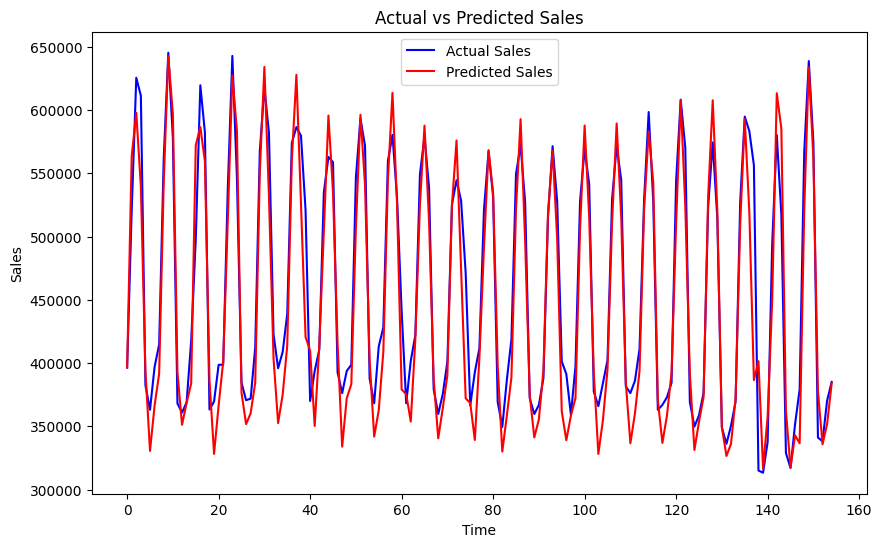

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Sales', color='blue')
plt.plot(y_pred_inv, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Mean Squared Error: 1123716733.233805


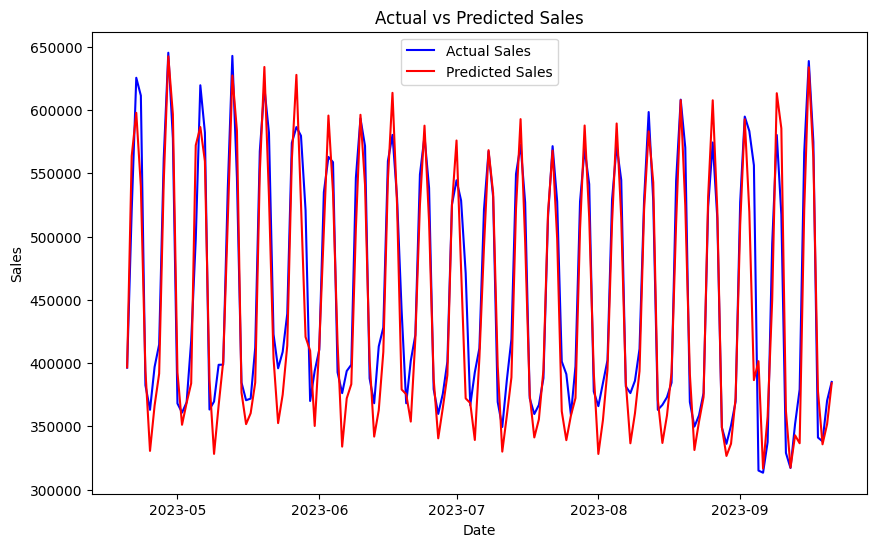

In [42]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-len(y_test):], y_test_inv, label='Actual Sales', color='blue')
plt.plot(data['Date'][-len(y_test):], y_pred_inv, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [45]:
# Trial prediction
temp1 = []
temp1.append(trial)
temp2 = []
temp2.append(temp1)
print(temp2)
prediction = model.predict(temp2)[0, 0]
print(prediction)

[[[0.47923356316762616, 0.46374405125518936, 0.48067926949375533, 0.7406037544341122, 0.8475508911647684, 0.7791539910855702, 0.5676402383960266, 0.48112283073133655, 0.4561315017507331, 0.5176553710841714]]]
1/1 [==============================] - 0s 126ms/step
0.5290075


In [46]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [47]:
print(X_test)
print(X_test[0, 0])


[[[0.47923356 0.46374405 0.48067927 ... 0.48112283 0.4561315  0.51765537]]

 [[0.52868167 0.47923356 0.46374405 ... 0.56764024 0.48112283 0.4561315 ]]

 [[0.69816985 0.52868167 0.47923356 ... 0.77915399 0.56764024 0.48112283]]

 ...

 [[0.45334314 0.77192635 0.85918378 ... 0.43675475 0.69368482 0.77949846]]

 [[0.44932031 0.45334314 0.77192635 ... 0.42052454 0.43675475 0.69368482]]

 [[0.4931939  0.44932031 0.45334314 ... 0.46787569 0.42052454 0.43675475]]]
[0.47923356 0.46374405 0.48067927 0.74060375 0.84755089 0.77915399
 0.56764024 0.48112283 0.4561315  0.51765537]


In [48]:
# -----------(1)----------------------------------
# model.predict([[2022-01-14]])
# error due to scaling of date attribute entities
# model.predict([[0.47923356]])

# -----------(2)----------------------------------
# input_date = np.array(0.47923356)
# input_date = np.reshape(input_date, (1, 1, 1))
# model.predict(np.reshape(input_date, (input_date.shape[0], 1, input_date.shape[1])))

# -----------(3)----------------------------------
# last_known_data = X[-1]
# print(last_known_data)
# n_features = X.shape[2]
# current_data = last_known_data.reshape(1, -1, n_features)
# future_sales_predictions = model.predict(current_data)[0, 0]
# print(future_sales_predictions)

# -----------(4)----------------------------------
def predict_future_sales(model, last_known_data, n_steps, n_features):
    future_predictions = []
    current_data = last_known_data.reshape(1, -1, n_features)  # Ensure the shape is [1, time steps, features]

    for _ in range(n_steps):
        # Predict the next step
        next_step_pred = model.predict(current_data)[0, 0]
        # Append prediction
        future_predictions.append(next_step_pred)
        # Update current data to include the new prediction
        current_data = np.roll(current_data, -1, axis=1)
        current_data[0, -1] = next_step_pred  # Update only the last time step with the new prediction

    return future_predictions

# Prepare the last known data (last 5 data points)
last_known_data = X[-1]  # Adjust as necessary to get the last known data points
n_features = X.shape[2]  # Number of features in your dataset


# Predict for future steps (e.g., for 2 years, adjust steps as needed)
n_steps = 365*2  # Assuming 365 days per year
future_sales_predictions = predict_future_sales(model, last_known_data, n_steps, n_features)
print(future_sales_predictions)


1/1 [==============================] - 0s 43ms/step
[0.51186013, 0.47824377, 0.4509819, 0.4306262, 0.41678557, 0.40816948, 0.40316898, 0.40040332, 0.3989184, 0.3981345, 0.3977245, 0.39751112, 0.39740038, 0.39734292, 0.39731318, 0.39729774, 0.39728975, 0.3972856, 0.39728343, 0.39728236, 0.39728177, 0.3972815, 0.39728135, 0.3972813, 0.39728123, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972812, 0.3972

In [49]:
print(len(future_sales_predictions))

730


In [60]:
prediction = model.predict([[[286363.32, 415667.81, 502955.83, 472878.87, 335006.62, 322661.2, 332919.47, 398828.19, 521347.82, 505548.25]]])[0, 0]
print(prediction)
lst = []
lst.append(prediction)
for i in range(10):
  lst.append(0)
lst = np.array(lst)
prediction = lst
prediction = np.array(prediction)
prediction = prediction.reshape(1, -1)
print(prediction.shape)
transformed_prediction = scaler.inverse_transform(prediction)
print(transformed_prediction[0, 0])


1/1 [==============================] - 0s 41ms/step
0.7368578
(1, 11)
549006.4390758419


In [61]:
# def predict_future_sales(model, last_known_data, n_steps, n_features):
#     future_predictions = []
#     current_data = last_known_data.reshape(1, -1, n_features)  # Ensure the shape is [1, time steps, features]

#     for _ in range(n_steps):
#         # Predict the next step
#         next_step_pred = model.predict(current_data)[0, 0]
#         # Append prediction
#         future_predictions.append(next_step_pred)
#         # Update current data to include the new prediction
#         current_data = np.roll(current_data, -1, axis=1)
#         current_data[0, -1] = next_step_pred  # Update only the last time step with the new prediction

#     return future_predictions

# # Prepare the last known data (last 5 data points)
# last_known_data = X[-1]  # Adjust as necessary to get the last known data points
# n_features = X.shape[2]  # Number of features in your dataset

# # Predict for future steps (e.g., for 2 years, adjust steps as needed)
# n_steps = 365 * 2  # Assuming 365 days per year
# future_sales_predictions = predict_future_sales(model, last_known_data, n_steps, n_features)


In [62]:
# web: gunicorn -w 4 -k uvicorn.workers.UvicornWorker app:app

In [63]:
from keras.models import load_model

# Assuming `model` is your Keras model
model.save('my_keras_model.h5')  # Save the model using Keras's native serialization


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
